In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib as mpl
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

In [7]:
df= pd.read_csv('dataset1.csv')
df.head()

,date,subs,comedy,drama,show,gala,talkshow,gameshow,music
0,2021-04-01,2973.0,3,4,0,0,0,1,1
1,2021-04-02,2864.0,3,3,0,0,0,1,1
2,2021-04-03,3014.0,3,3,0,0,0,1,1
3,2021-04-04,3118.0,3,3,0,0,0,1,1
4,2021-04-05,2894.0,3,3,0,0,0,1,1


In [8]:
df.isnull().sum()

date          0
subs        136
comedy        0
drama         0
show          0
gala          0
talkshow      0
gameshow      0
music         0
dtype: int64

### CART Regression Feature Importance

Feature: 0, Score: 0.35428
Feature: 1, Score: 0.11657
Feature: 2, Score: 0.00845
Feature: 3, Score: 0.00893
Feature: 4, Score: 0.15728
Feature: 5, Score: 0.28376
Feature: 6, Score: 0.07073


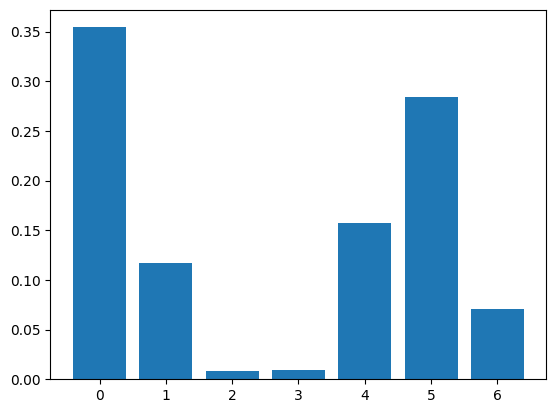

In [9]:
#tạo đặc trưng X, y
X = df[['comedy', 'drama', 'show', 'gala', 'talkshow', 'gameshow', 'music']]
y = df['subs']
# Xử lý giá trị NaN trong nhãn y (nếu có)
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Với FIS (feature importance score) được tính như trên, có 4 biến được chọn là biến số 0, 1, 4, 5 tương ứng với các loại movie_show là comedy, drama, talkshow, gameshow